# QPCR CT VALUE DATA TRANSFORMATION

In [162]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/fabzy4L/DATA_ANALYTICS/main/GENE_EXPRESSION%20NICOTINE_R/qPCRCTValues.csv')

In [4]:
print(df)


     PLATE WELL Target Name SAMPLE      GENEID            CT
0        1   A1       INSRR   100%      INSRR1       29.5760
1        1   A2       INSRR    10%    INSRR0.1       32.3810
2        1   A3       INSRR     1%   INSRR0.01       36.3370
3        1   A4       INSRR  0.10%  INSRR0.001  Undetermined
4        1   A5       INSRR     C1     INSRRC1       30.1750
..     ...  ...         ...    ...         ...           ...
303      7  E10        FGF1     V5      FGF1V5       22.2950
304      7  E11        FGF1     V7      FGF1V7       22.9350
305      7  E12        FGF1     V8      FGF1V8       23.0470
306      7   F5        FGF1    V10     FGF1V10       23.2250
307      7   F6        FGF1    V12     FGF1V12       23.5620

[308 rows x 6 columns]


In [5]:
df.columns.tolist()

['PLATE', 'WELL', 'Target Name', 'SAMPLE', 'GENEID', 'CT']

In [43]:
name_values = df['Target Name'].unique()
name_values = name_values.tolist()
name_values

['INSRR',
 'GAPDH',
 'IGF2',
 'CCL2',
 'BCAS1',
 'MOBP',
 'PAIPB',
 'SLC27A6',
 'MBP',
 'COL1A1',
 'CDH19',
 'ERNM',
 'OPALIN',
 'FGF1']

In [35]:
txt = input()
txt = txt.upper()
txt

Target Name


'TARGET NAME'

In [40]:
rdf = df[['SAMPLE','Target Name','CT']]
rdf = rdf.rename(columns={'SAMPLE': 'SAMPLE', 'Target Name':'GENE', 'CT':'CT'})
rdf



SAMPLE   GENE            CT
0     100%  INSRR       29.5760
1      10%  INSRR       32.3810
2       1%  INSRR       36.3370
3    0.10%  INSRR  Undetermined
4       C1  INSRR       30.1750
..     ...    ...           ...
303     V5   FGF1       22.2950
304     V7   FGF1       22.9350
305     V8   FGF1       23.0470
306    V10   FGF1       23.2250
307    V12   FGF1       23.5620

[308 rows x 3 columns]

In [93]:
# Create an empty dictionary to store the smaller DataFrames
dfs_by_gene = {}

# Loop through unique values in the 'Category' column
for gene in rdf['GENE'].unique():
    # Filter the DataFrame based on the 'Category' column
    filtered_df = rdf[rdf['GENE'] == gene]
    
    # Store the filtered DataFrame in the dictionary
    dfs_by_gene[gene] = filtered_df

# Now, dfs_by_category contains smaller DataFrames for each unique category
# You can access them like this:
dfs_by_gene['INSRR'] = dfs_by_gene['INSRR'].reset_index(drop=True)
dfs_by_gene['GAPDH'] = dfs_by_gene['GAPDH'].reset_index(drop=True)
dfs_by_gene['IGF2'] = dfs_by_gene['IGF2'].reset_index(drop=True)
dfs_by_gene['CCL2'] = dfs_by_gene['CCL2'].reset_index(drop=True)
dfs_by_gene['BCAS1'] = dfs_by_gene['BCAS1'].reset_index(drop=True)
dfs_by_gene['MOBP'] = dfs_by_gene['MOBP'].reset_index(drop=True)
dfs_by_gene['PAIPB'] = dfs_by_gene['PAIPB'].reset_index(drop=True)
dfs_by_gene['SLC27A6'] = dfs_by_gene['SLC27A6'].reset_index(drop=True)
dfs_by_gene['MBP'] = dfs_by_gene['MBP'].reset_index(drop=True)
dfs_by_gene['COL1A1'] = dfs_by_gene['COL1A1'].reset_index(drop=True)
dfs_by_gene['CDH19'] = dfs_by_gene['CDH19'].reset_index(drop=True)
dfs_by_gene['ERNM'] = dfs_by_gene['ERNM'].reset_index(drop=True)
dfs_by_gene['OPALIN'] = dfs_by_gene['OPALIN'].reset_index(drop=True)
dfs_by_gene['FGF1'] = dfs_by_gene['FGF1'].reset_index(drop=True)

GAPDH	 = 	dfs_by_gene['GAPDH']
INSRR	 = 	dfs_by_gene['INSRR']
IGF2	 = 	dfs_by_gene['IGF2']
CCL2	 = 	dfs_by_gene['CCL2']
BCAS1	 = 	dfs_by_gene['BCAS1']
MOBP	 = 	dfs_by_gene['MOBP']
PAIPB	 = 	dfs_by_gene['PAIPB']
SLC27A6	 = 	dfs_by_gene['SLC27A6']
MBP	 = 	dfs_by_gene['MBP']
COL1A1	 = 	dfs_by_gene['COL1A1']
CDH19	 = 	dfs_by_gene['COL1A1']
ERNM	 = 	dfs_by_gene['ERNM']
OPALIN	 = 	dfs_by_gene['OPALIN']
FGF1	 = 	dfs_by_gene['FGF1']

GAPDH	 = 	GAPDH.rename(columns={'CT':'GAPDH'})
INSRR	 = 	INSRR.rename(columns={'CT':'INSRR'})
IGF2	 = 	IGF2.rename(columns={'CT':'IGF2'})
CCL2	 = 	CCL2.rename(columns={'CT':'CCL2'})
BCAS1	 = 	BCAS1.rename(columns={'CT':'BCAS1'})
MOBP	 = 	MOBP.rename(columns={'CT':'MOBP'})
PAIPB	 = 	PAIPB.rename(columns={'CT':'PAIPB'})
SLC27A6	 = 	SLC27A6.rename(columns={'CT':'SLC27A6'})
MBP	 = 	MBP.rename(columns={'CT':'MBP'})
COL1A1	 = 	COL1A1.rename(columns={'CT':'COL1A1'})
CDH19	 = 	CDH19.rename(columns={'CT':'CDH19'})
ERNM	 = 	ERNM.rename(columns={'CT':'ERNM'})
OPALIN	 = 	OPALIN.rename(columns={'CT':'OPALIN'})
FGF1	 = 	FGF1.rename(columns={'CT':'FGF1'})

GAPDH_CT = GAPDH[['GAPDH']]
INSRR_CT = INSRR[['INSRR']]
IGF2_CT = IGF2[['IGF2']]
CCL2_CT = CCL2[['CCL2']]
BCAS1_CT = BCAS1[['BCAS1']]
MOBP_CT = MOBP[['MOBP']]
PAIPB_CT = PAIPB[['PAIPB']]
SLC27A6_CT = SLC27A6[['SLC27A6']]
MBP_CT = MBP[['MBP']]
COL1A1_CT = COL1A1[['COL1A1']]
CDH19_CT = CDH19[['CDH19']]
ERNM_CT = ERNM[['ERNM']]
OPALIN_CT = OPALIN[['OPALIN']]
FGF1_CT = FGF1[['FGF1']]


In [157]:
rdf_samples = rdf['SAMPLE']
rdf_samples = rdf_samples.unique()
rdf_samples = rdf_samples.tolist()
rdf_samples = pd.DataFrame(rdf_samples)
rdf_samples = rdf_samples.iloc[:,:]
rdf_samples = rdf_samples.rename(columns={0:"SAMPLE"})
rdf_test = rdf_samples.iloc[4:,:]

In [218]:
matrix_df = pd.concat([rdf_samples, GAPDH_CT,
INSRR_CT,
IGF2_CT,
CCL2_CT,
BCAS1_CT,
MOBP_CT,
PAIPB_CT,
SLC27A6_CT,
MBP_CT,
COL1A1_CT,
CDH19_CT,
ERNM_CT,
OPALIN_CT,
FGF1_CT,] ,axis=1)

In [219]:
matrix_df

SAMPLE    GAPDH         INSRR     IGF2          CCL2    BCAS1     MOBP  \
0    100%  14.9710       29.5760  22.0550       30.8810  28.9980  30.1330   
1     10%  17.7530       32.3810  25.1170       33.7820  27.7220  25.8320   
2      1%  21.1390       36.3370  28.6210       37.1570  31.8770  29.3060   
3   0.10%  24.7670  Undetermined  32.0790  Undetermined  34.1450  32.2680   
4      C1  14.6760       30.1750  22.9830       30.8270  25.6340  23.5620   
5      C2  14.8820       29.7200  22.1330       31.8500  25.8720  24.2230   
6      C3  15.2700       31.2400  22.9730       31.9470  25.6350  23.4370   
7      C5  16.2830       31.8240  24.1870       33.4060  26.2340  24.3430   
8      C6  17.6380       34.3120  26.2950       33.0120  26.6040  26.4010   
9      C7  15.2660       30.2910  23.0920       31.7020  25.2770  23.8780   
10    C10  15.6480       30.3390  23.0170       31.7090  25.7780  23.4820   
11    C11  15.7670       30.2720  23.2040       32.6190  26.3680  24.7800   
12    C12  15.6550       30.9210  23.2650       32.2300  25.8700  23.6110   
13     V1  15.8530       29.9270  22.5830       31.9490  26.0280  24.2620   
14     V2  15.4300       29.5950  22.6300       31.2200  26.5860  25.2280   
15     V3  15.7410       30.1980  22.5730       31.8570  26.1640  24.5650   
16     V4  15.4910       30.5830  23.2870       31.7610  25.8810  24.4700   
17     V5  14.5080       29.4320  22.1690       30.9700  25.1960  24.1700   
18     V7  15.2610       29.4050  22.1490       31.7180  26.1280  24.8020   
19     V8  15.5710       30.9040  23.1600       32.3570  25.5770  23.9360   
20    V10  16.3410       31.5620  23.5210       31.7800  25.7960  24.3360   
21    V12  16.2380       31.6410  24.0140       32.2910  26.1530  25.4320   

     PAIPB       SLC27A6      MBP   COL1A1    CDH19     ERNM   OPALIN     FGF1  
0   21.808         30.65  18.9820  26.2430  26.2430  24.7830  26.4750  22.3600  
1   25.059        33.799  22.2360  28.1800  28.1800  26.4020  29.7130  25.6620  
2    28.38        36.702  25.6740  31.6880  31.6880  30.0760  32.7760  28.7530  
3   31.864  Undetermined  28.8410  35.5820  35.5820  32.4040  35.9700  32.2230  
4   22.893        30.779  19.5670  26.5480  26.5480  23.9320  26.8290  23.1720  
5   22.436        30.746  20.1920  25.7310  25.7310  24.4070  27.0750  22.9460  
6   22.742        31.359  19.4700  26.3500  26.3500  23.4840  26.7510  23.3420  
7   23.482        32.103  20.3630  26.9920  26.9920  24.3210  27.6500  23.4870  
8   24.942        33.279  20.2870  28.4540  28.4540  24.6020  29.1440  23.8280  
9   22.298        31.185  19.3060  25.9560  25.9560  24.1630  26.8070  22.7230  
10  23.168        31.187  19.6890  26.2400  26.2400  23.9350  26.9260  23.3730  
11  23.205        31.809  20.0810  26.4420  26.4420  24.7210  27.5190  23.6040  
12  23.213        31.469  19.7580  25.8260  25.8260  24.0830  27.6560  23.2820  
13   23.01        31.498  20.1310  25.9890  25.9890  24.5830  27.6580  23.3770  
14  22.655        31.662  20.6950  26.1960  26.1960  24.8540  27.5370  23.0410  
15   22.47        31.102  20.7850  26.1210  26.1210  24.7840  27.9410  23.0340  
16  23.017        31.785  20.0160  26.5150  26.5150  24.2090  27.0370  23.3130  
17  21.754        30.372  19.2220  25.8530  25.8530  23.5340  26.3750  22.2950  
18  22.535        31.289  20.3850  25.5170  25.5170  24.9730  27.6050  22.9350  
19  22.621        33.594  19.5380  26.8940  26.8940  24.2530  26.6340  23.0470  
20  23.228         31.86  19.9110  27.0240  27.0240  24.3900  27.4190  23.2250  
21  23.271        32.264  20.9310  27.5560  27.5560  24.7730  27.9600  23.5620

In [220]:
samples_df = matrix_df.iloc[4:,:]
samples_df

SAMPLE    GAPDH    INSRR     IGF2     CCL2    BCAS1     MOBP   PAIPB  \
4      C1  14.6760  30.1750  22.9830  30.8270  25.6340  23.5620  22.893   
5      C2  14.8820  29.7200  22.1330  31.8500  25.8720  24.2230  22.436   
6      C3  15.2700  31.2400  22.9730  31.9470  25.6350  23.4370  22.742   
7      C5  16.2830  31.8240  24.1870  33.4060  26.2340  24.3430  23.482   
8      C6  17.6380  34.3120  26.2950  33.0120  26.6040  26.4010  24.942   
9      C7  15.2660  30.2910  23.0920  31.7020  25.2770  23.8780  22.298   
10    C10  15.6480  30.3390  23.0170  31.7090  25.7780  23.4820  23.168   
11    C11  15.7670  30.2720  23.2040  32.6190  26.3680  24.7800  23.205   
12    C12  15.6550  30.9210  23.2650  32.2300  25.8700  23.6110  23.213   
13     V1  15.8530  29.9270  22.5830  31.9490  26.0280  24.2620   23.01   
14     V2  15.4300  29.5950  22.6300  31.2200  26.5860  25.2280  22.655   
15     V3  15.7410  30.1980  22.5730  31.8570  26.1640  24.5650   22.47   
16     V4  15.4910  30.5830  23.2870  31.7610  25.8810  24.4700  23.017   
17     V5  14.5080  29.4320  22.1690  30.9700  25.1960  24.1700  21.754   
18     V7  15.2610  29.4050  22.1490  31.7180  26.1280  24.8020  22.535   
19     V8  15.5710  30.9040  23.1600  32.3570  25.5770  23.9360  22.621   
20    V10  16.3410  31.5620  23.5210  31.7800  25.7960  24.3360  23.228   
21    V12  16.2380  31.6410  24.0140  32.2910  26.1530  25.4320  23.271   

   SLC27A6      MBP   COL1A1    CDH19     ERNM   OPALIN     FGF1  
4   30.779  19.5670  26.5480  26.5480  23.9320  26.8290  23.1720  
5   30.746  20.1920  25.7310  25.7310  24.4070  27.0750  22.9460  
6   31.359  19.4700  26.3500  26.3500  23.4840  26.7510  23.3420  
7   32.103  20.3630  26.9920  26.9920  24.3210  27.6500  23.4870  
8   33.279  20.2870  28.4540  28.4540  24.6020  29.1440  23.8280  
9   31.185  19.3060  25.9560  25.9560  24.1630  26.8070  22.7230  
10  31.187  19.6890  26.2400  26.2400  23.9350  26.9260  23.3730  
11  31.809  20.0810  26.4420  26.4420  24.7210  27.5190  23.6040  
12  31.469  19.7580  25.8260  25.8260  24.0830  27.6560  23.2820  
13  31.498  20.1310  25.9890  25.9890  24.5830  27.6580  23.3770  
14  31.662  20.6950  26.1960  26.1960  24.8540  27.5370  23.0410  
15  31.102  20.7850  26.1210  26.1210  24.7840  27.9410  23.0340  
16  31.785  20.0160  26.5150  26.5150  24.2090  27.0370  23.3130  
17  30.372  19.2220  25.8530  25.8530  23.5340  26.3750  22.2950  
18  31.289  20.3850  25.5170  25.5170  24.9730  27.6050  22.9350  
19  33.594  19.5380  26.8940  26.8940  24.2530  26.6340  23.0470  
20   31.86  19.9110  27.0240  27.0240  24.3900  27.4190  23.2250  
21  32.264  20.9310  27.5560  27.5560  24.7730  27.9600  23.5620

In [221]:
calibrator_df = matrix_df.iloc[:4,:]
calibrator_df

SAMPLE    GAPDH         INSRR     IGF2          CCL2    BCAS1     MOBP  \
0   100%  14.9710       29.5760  22.0550       30.8810  28.9980  30.1330   
1    10%  17.7530       32.3810  25.1170       33.7820  27.7220  25.8320   
2     1%  21.1390       36.3370  28.6210       37.1570  31.8770  29.3060   
3  0.10%  24.7670  Undetermined  32.0790  Undetermined  34.1450  32.2680   

    PAIPB       SLC27A6      MBP   COL1A1    CDH19     ERNM   OPALIN     FGF1  
0  21.808         30.65  18.9820  26.2430  26.2430  24.7830  26.4750  22.3600  
1  25.059        33.799  22.2360  28.1800  28.1800  26.4020  29.7130  25.6620  
2   28.38        36.702  25.6740  31.6880  31.6880  30.0760  32.7760  28.7530  
3  31.864  Undetermined  28.8410  35.5820  35.5820  32.4040  35.9700  32.2230

In [222]:
calibrator_df.columns

Index(['SAMPLE', 'GAPDH', 'INSRR', 'IGF2', 'CCL2', 'BCAS1', 'MOBP', 'PAIPB',
       'SLC27A6', 'MBP', 'COL1A1', 'CDH19', 'ERNM', 'OPALIN', 'FGF1'],
      dtype='object')

In [230]:
# Function to safely convert a value to numeric
def safe_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value  # Return the original value if conversion fails


# Apply the safe_to_numeric function to all elements in the DataFrame
calibrator_df = calibrator_df.applymap(safe_to_numeric)
samples_df = samples_df.applymap(safe_to_numeric)
samples_df

SAMPLE   GAPDH   INSRR    IGF2    CCL2   BCAS1    MOBP   PAIPB  SLC27A6  \
4      C1  14.676  30.175  22.983  30.827  25.634  23.562  22.893   30.779   
5      C2  14.882  29.720  22.133  31.850  25.872  24.223  22.436   30.746   
6      C3  15.270  31.240  22.973  31.947  25.635  23.437  22.742   31.359   
7      C5  16.283  31.824  24.187  33.406  26.234  24.343  23.482   32.103   
8      C6  17.638  34.312  26.295  33.012  26.604  26.401  24.942   33.279   
9      C7  15.266  30.291  23.092  31.702  25.277  23.878  22.298   31.185   
10    C10  15.648  30.339  23.017  31.709  25.778  23.482  23.168   31.187   
11    C11  15.767  30.272  23.204  32.619  26.368  24.780  23.205   31.809   
12    C12  15.655  30.921  23.265  32.230  25.870  23.611  23.213   31.469   
13     V1  15.853  29.927  22.583  31.949  26.028  24.262  23.010   31.498   
14     V2  15.430  29.595  22.630  31.220  26.586  25.228  22.655   31.662   
15     V3  15.741  30.198  22.573  31.857  26.164  24.565  22.470   31.102   
16     V4  15.491  30.583  23.287  31.761  25.881  24.470  23.017   31.785   
17     V5  14.508  29.432  22.169  30.970  25.196  24.170  21.754   30.372   
18     V7  15.261  29.405  22.149  31.718  26.128  24.802  22.535   31.289   
19     V8  15.571  30.904  23.160  32.357  25.577  23.936  22.621   33.594   
20    V10  16.341  31.562  23.521  31.780  25.796  24.336  23.228   31.860   
21    V12  16.238  31.641  24.014  32.291  26.153  25.432  23.271   32.264   

       MBP  COL1A1   CDH19    ERNM  OPALIN    FGF1  
4   19.567  26.548  26.548  23.932  26.829  23.172  
5   20.192  25.731  25.731  24.407  27.075  22.946  
6   19.470  26.350  26.350  23.484  26.751  23.342  
7   20.363  26.992  26.992  24.321  27.650  23.487  
8   20.287  28.454  28.454  24.602  29.144  23.828  
9   19.306  25.956  25.956  24.163  26.807  22.723  
10  19.689  26.240  26.240  23.935  26.926  23.373  
11  20.081  26.442  26.442  24.721  27.519  23.604  
12  19.758  25.826  25.826  24.083  27.656  23.282  
13  20.131  25.989  25.989  24.583  27.658  23.377  
14  20.695  26.196  26.196  24.854  27.537  23.041  
15  20.785  26.121  26.121  24.784  27.941  23.034  
16  20.016  26.515  26.515  24.209  27.037  23.313  
17  19.222  25.853  25.853  23.534  26.375  22.295  
18  20.385  25.517  25.517  24.973  27.605  22.935  
19  19.538  26.894  26.894  24.253  26.634  23.047  
20  19.911  27.024  27.024  24.390  27.419  23.225  
21  20.931  27.556  27.556  24.773  27.960  23.562

In [231]:
calibrator_df
#matrix_df

SAMPLE   GAPDH   INSRR    IGF2    CCL2   BCAS1    MOBP   PAIPB  SLC27A6  \
0   100%  14.971  29.576  22.055  30.881  28.998  30.133  21.808   30.650   
1    10%  17.753  32.381  25.117  33.782  27.722  25.832  25.059   33.799   
2     1%  21.139  36.337  28.621  37.157  31.877  29.306  28.380   36.702   
3  0.10%  24.767     NaN  32.079     NaN  34.145  32.268  31.864      NaN   

      MBP  COL1A1   CDH19    ERNM  OPALIN    FGF1  
0  18.982  26.243  26.243  24.783  26.475  22.360  
1  22.236  28.180  28.180  26.402  29.713  25.662  
2  25.674  31.688  31.688  30.076  32.776  28.753  
3  28.841  35.582  35.582  32.404  35.970  32.223

In [227]:
#Remove undertermined with NaN
calibrator_df['INSRR'] = pd.to_numeric(calibrator_df['INSRR'], errors='coerce')
calibrator_df['CCL2'] = pd.to_numeric(calibrator_df['CCL2'], errors='coerce')
calibrator_df['SLC27A6'] = pd.to_numeric(calibrator_df['SLC27A6'], errors='coerce')
#matrix_df['SLC27A6'] = pd.to_numeric(calibrator_df['SLC27A6'], errors='coerce')


In [229]:
#calibrator_df = calibrator_df.dropna(axis=1)

column_dtype = calibrator_df['SLC27A6'].dtype
column_dtype

## Convert the column to float
#calibrator_df['INSRR'] = calibrator_df['INSRR'].astype(float)

dtype('float64')

In [234]:
# Select Column A as Y
Y = (0,-1,-2,-3)
# Create a DataFrame to store the results

#results = pd.DataFrame(columns=['Column', 'R-squared', 'Intercept', 'Slope'])
results_list = []

# Loop through the other columns (B, C, D, E)
for column_name in ['GAPDH', 'INSRR', 'IGF2', 'CCL2', 'BCAS1', 'MOBP', 'PAIPB',
       'SLC27A6', 'MBP', 'COL1A1', 'CDH19', 'ERNM', 'OPALIN', 'FGF1']:
    X = calibrator_df[column_name].values.reshape(-1, 1)  # Reshape to a 2D array
    
    imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X = imputer.fit_transform(X)
    
    model = LinearRegression().fit(X, Y)
    
    # Calculate R-squared
    r_squared = model.score(X, Y)
    
    # Get intercept and slope
    intercept = model.intercept_
    slope = model.coef_[0]
    
      # Create a DataFrame for the current column's results
    column_results = pd.DataFrame({
        'Column': [column_name],
        'R-squared': [r_squared],
        'Intercept': [intercept],
        'Slope': [slope]
    })
    
     # Append the current column's results to the list
    results_list.append(column_results)
    
    
 # Append results to the DataFrame
    #results = results.append({'Column': column_name, 'R-squared': r_squared, 'Intercept': intercept, 'Slope': slope}, ignore_index=True)

# Concatenate the list of DataFrames into one DataFrame
results = pd.concat(results_list, ignore_index=True)

# Print the results DataFrame
results


Column  R-squared  Intercept     Slope
0     GAPDH   0.996558   4.477252 -0.304070
1     INSRR   0.396173   8.099517 -0.292984
2      IGF2   0.999094   6.524651 -0.297562
3      CCL2   0.399241   9.295280 -0.318070
4     BCAS1   0.767460  10.517704 -0.391641
5      MOBP   0.226951   5.250585 -0.229731
6     PAIPB   0.999750   6.493987 -0.298531
7   SLC27A6   0.399780   9.636299 -0.330287
8       MBP   0.999775   5.747577 -0.302825
9    COL1A1   0.979738   7.954976 -0.310781
10    CDH19   0.979738   7.954976 -0.310781
11     ERNM   0.980398   8.998257 -0.369446
12   OPALIN   0.999896   8.399283 -0.316944
13     FGF1   0.999542   6.834462 -0.305857

In [240]:
#y = mx + b

def yfxn(x, m, b):
    """THIS FUNCTION CALCULATES SLOPE"""
    y = 10 ** (m * x  + b)
    return y


In [242]:
samples_df.columns
cols_to_num = samples_df[['GAPDH', 'INSRR', 'IGF2', 'CCL2', 'BCAS1', 'MOBP']]

In [ ]:
for col2 in cols_to_num:
    samples_df[col2] = pd.to_numeric(samples_df[col2], errors='coerce')
    
    

In [249]:
samples_df_INSRR = samples_df['INSRR'].dtype
this = yfxn(matrix_df_INSRR,-0.292984,8.099517)
this
#samples_df_INSRR 

TypeError: can't multiply sequence by non-int of type 'float'

In [54]:

GAPDH = df[(df['Target Name'] == 'GAPDH') ]
GAPDH = GAPDH[['Target Name', 'SAMPLE', 'CT']]
GAPDH_LM = GAPDH.iloc[:4,:]
GAPDH_VDS = GAPDH.iloc[4:,:]
GAPDH_VDS = GAPDH_VDS['CT'].to_numpy()
GAPDH_VDS = GAPDH_VDS.tolist()
GAPDH_LM 

Target Name SAMPLE       CT
22       GAPDH   100%  14.9710
23       GAPDH    10%  17.7530
24       GAPDH     1%  21.1390
25       GAPDH  0.10%  24.7670

In [31]:
GAPDH_VDS

['14.6760',
 '14.8820',
 '15.2700',
 '16.2830',
 '17.6380',
 '15.2660',
 '15.6480',
 '15.7670',
 '15.6550',
 '15.8530',
 '15.4300',
 '15.7410',
 '15.4910',
 '14.5080',
 '15.2610',
 '15.5710',
 '16.3410',
 '16.2380']

In [92]:
##CALIBRATORS
y = (1,0.1,0.01,0.001)
ylog = np.log10(y)
ylog = ylog.tolist()
df_ycal = pd.DataFrame(ylog)
df_ycal

0
0  0.0
1 -1.0
2 -2.0
3 -3.0

In [16]:
df_xcal = GAPDH_LM['CT'].tolist()
df_xcal = pd.DataFrame(df_xcal)
df_xcal


0
0  14.9710
1  17.7530
2  21.1390
3  24.7670

In [31]:
df_cal = pd.concat([df_xcal, df_ycal], axis=1, ignore_index=True)
df_cal

0    1
0  14.9710  0.0
1  17.7530 -1.0
2  21.1390 -2.0
3  24.7670 -3.0

In [45]:
df_cal = df_cal.rename(columns={'NewName1': 'CT', 'NewName2': 'log(y)'})

df_cal.columns.tolist()
df_cal

CT  log(y)
0  14.9710     0.0
1  17.7530    -1.0
2  21.1390    -2.0
3  24.7670    -3.0

In [84]:
# Extract the columns you want to plot
GAPDH_LMX = df_cal[['CT']].to_numpy()
GAPDH_LMY = df_cal[['log(y)']].to_numpy()

#X_train, X_test, y_train, y_test = train_test_split(GAPDH_LMX, GAPDH_LMY, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(GAPDH_LMX, GAPDH_LMY)

# Evaluate the model on the testing data
r_squared = model.score(GAPDH_LMX, GAPDH_LMY)
print(f"R-squared: {r_squared}")

R-squared: 0.9965582945298149


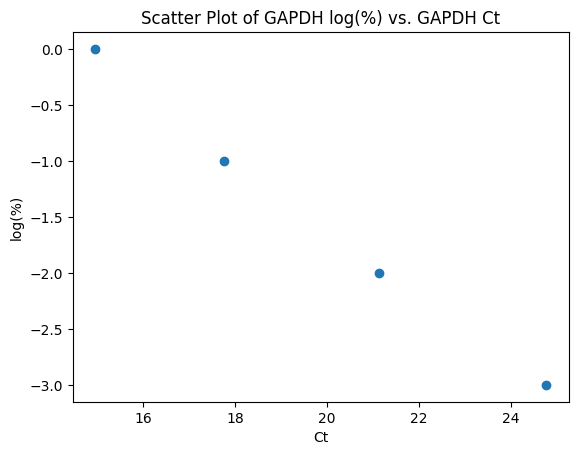

In [88]:
plt.scatter(GAPDH_LMX.tolist(), GAPDH_LMY.tolist())  # Scatter plot

# Add labels and a title
plt.xlabel('Ct')
plt.ylabel('log(%)')
plt.title('Scatter Plot of GAPDH log(%) vs. GAPDH Ct')

# Show the plot
plt.show()

In [81]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(GAPDH_LMX, GAPDH_LMY)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Make predictions
predictions = model.predict(GAPDH_LMX)

# Calculate R-squared
r_squared = model.score(GAPDH_LMX, GAPDH_LMY)

# Calculate Slope
slope = model.coef_[0]

print("R-squared:", r_squared)
print(f"Slope: {slope}")
print("Intercept:", intercept)
print("Coefficients:", coefficients)

R-squared: 0.9965582945298149
Slope: [-0.30406978]
Intercept: [4.47725169]
Coefficients: [[-0.30406978]]


In [138]:
#y = mx + b

#def yfxn(x):
 #   """THIS FUNCTION CALCULATES SLOPE"""
  #  y = 10 ** ((-0.30406978 * x ) + 4.47725169)
   # return y

In [139]:
GAPDH

Target Name SAMPLE      CT
22       GAPDH   100%  14.971
23       GAPDH    10%  17.753
24       GAPDH     1%  21.139
25       GAPDH  0.10%  24.767
26       GAPDH     C1  14.676
27       GAPDH     C2  14.882
28       GAPDH     C3  15.270
29       GAPDH     C5  16.283
30       GAPDH     C6  17.638
31       GAPDH     C7  15.266
32       GAPDH    C10  15.648
33       GAPDH    C11  15.767
34       GAPDH    C12  15.655
35       GAPDH     V1  15.853
36       GAPDH     V2  15.430
37       GAPDH     V3  15.741
38       GAPDH     V4  15.491
39       GAPDH     V5  14.508
40       GAPDH     V7  15.261
41       GAPDH     V8  15.571
42       GAPDH    V10  16.341
43       GAPDH    V12  16.238

In [140]:
# Assuming ct_data is a NumPy array
GAPDH_VDS = GAPDH_VDS['CT'].to_numpy(dtype=float)  # Convert to float NumPy array

# Calculate the slope using the yfxn function
GAPDH_slopes = yfxn(GAPDH_VDS)
slopes.tolist()


[1.034483573019855,
 0.8955404852358891,
 0.6825054904015793,
 0.33580214214730425,
 0.13003758948664804,
 0.6844195848815772,
 0.5238027480573165,
 0.48192945280830696,
 0.5212418578961392,
 0.4537675838894248,
 0.6101758075527252,
 0.49078274237296954,
 0.5846645042107014,
 1.1636096700862362,
 0.6868197536354287,
 0.5528166891610234,
 0.3224388882188334,
 0.3465505579162425]